# TME UE IAR: From Traditional EA to Quality-Diversity algorithms

Version du 26 novembre 2022

* Etudiant1: dufourmantelle jérémy
* Etudiant2: abitbol ethan

**Pour faciliter le suivi, merci à chaque membre du binome de soumettre le TME sous son nom.**

Cette séance de TME consiste à mettre en oeuvre des méthodes d'apprentissage de type "direct policy search" s'appuyant sur des algorithmes évolutionnaires. 

Ces algorithmes s'appuient sur des opérateurs de recherche stochastiques. Si vous lancez plusieurs fois une même expérience avec une graine aléatoire différente vous obtiendrez des résultats différents. Dans la mesure du possible et de la puissance de calcul que vous avez à disposition et s'il n'a pas été demandé explicitement de ne faire qu'une seule expérience, il est donc souhaitable de répéter les expériences plusieurs fois avant de conclure.

Les cellules à compléter sont marquées <à compléter>.

Vous prendrez soin de mettre des commentaires dans votre code et, pour chaque question, vous décrirez rapidement le travail réalisé. Vous prendrez soin de ne soumettre que les fichiers nécessaires (merci d'éviter les fichiers de log inutiles et de taille conséquente...).

## 1. Introduction

### 1.1 Dépendances

La seule dépendance nécessaire à ce TP est DEAP que vous pourrez installer de la façon suivante:



In [3]:
!pip install deap
!pip install plot

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 kB 3.0 MB/s eta 0:00:000:00:01
  Using cached numpy-1.22.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.6.1 requires gym==0.21, but you have gym 0.18.3 which is incompatible.
flappy-bird-gym 0.3.0 requires numpy~=1.19.5, but you have numpy 1.22.4 which is incompatible.


In [1]:
# Il n'y a rien à faire d'autre que d'exécuter cette cellule, 
# elle contient des imports qui vous seront utiles

# Note: l'import d'un fichier ne se fait qu'une seule fois. Si vous modifiez ce fichier, 
# il vous faut redémarrer votre kernel si vous voulez prendre en compte les modifications.
# vous pouvez éviter cela de la façon suivante: 
import importlib # une seule fois
import plot # le module doit avoir été importé une première fois
importlib.reload(plot) # cette ligne permet de charger la dernière version

import matplotlib.pyplot as plt

# pour que les figures apparaissent directement dans le notebook
%matplotlib inline 

### 1.2 Environnement utilisé pour les expériences

Vous allez utiliser un environnement simplifié pour permettre aux calculs d'être suffisamment rapides quelque soit votre environnement de travail. Il s'agit de la simulation d'un bras robotique articulé. Les paramètres explorés par l'algorithme évolutionnaire correspondent à l'angle que fait chaque segment par rapport au segment précédent. Il n'y a donc pas de politique à proprement parler.

Représentation d'un bras à 3 degrés de liberté avec la cible et les obstacles qui seront utilisés dans la suite.


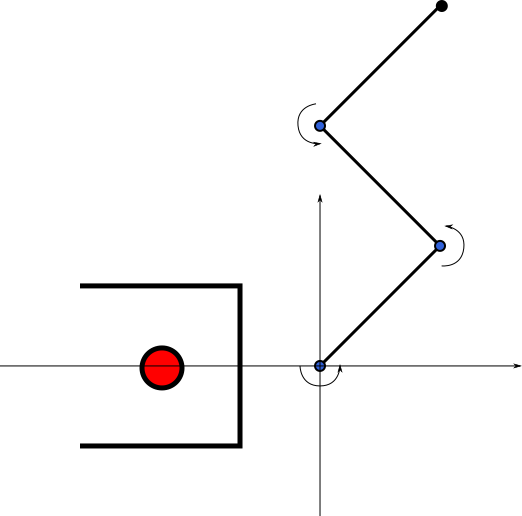

In [2]:
from IPython.display import Image

fig = Image(filename=('bras.png'))
print("Représentation d'un bras à 3 degrés de liberté avec la cible et les obstacles qui seront utilisés dans la suite.")
fig

L'objectif des expériences est de déterminer les configurations du bras permettant d'atteindre diverses positions de l'espace avec l'effecteur terminal. Ces configurations peuvent être déterminées par le calcul, mais elles seront déterminées ici par l'algorithme évolutionnaire. Des obstacles ont été ajoutés dans l'environnement. La première partie du TP vise à atteindre la cible en rouge (avec un bras qui disposera de plus de segment que le bras représenté ici). La deuxième partie du TP vise à trouver des configurations du bras permettant d'atteindre l'ensemble des positions atteignables.

## 2 Comparaison des expériences de Fit, NS et Fit+NS

Cette première partie vise à vous faire prendre en main 3 variantes d'apprentissage direct dans l'espace des "politiques" (le terme de "politique" est ici un peu abusif, mais nous l'utiliserons tout de même dans la suite):
- FIT: algorithme élitiste guidé par une fitness globale
- NS: algorithme de recherche de nouveauté (novelty search)
- FIT+NS: algorithme combinant FIT et NS avec une approche multi-objectif 

Vous regarderez attentivement le fichier ea_dps_ka.py et vous le compléterez pour afficher un message chaque fois qu'une politique améliore la fitness globale. A cette occasion, vous sauvegarderez la configuration de cet individu pour pouvoir la tracer ensuite dans les questions suivantes de ce notebook.

### 2.1 Variante Fit

Lancez quelques expériences avec la variante FIT. Tracez l'évolution de la fitness (opposé de la distance à la cible à maximiser) en fonction des générations et donnez les statistiques des résultats obtenus (combien d'expériences atteignent la cible, en combien de génération en moyenne). La cible sera considérée comme atteinte si l'effecteur terminal est à une distance de 0.5 ou moins de celle-ci. Vous tracerez également les configurations intermédiares du bras correspondant à des améliorations de la fitness (vous en tracerez une dizaime maximum pour ne pas surcharger le notebook).

In [20]:
# <à compléter>

# décrivez en quelques mots ce que vous avez fait, tracez les courbes d'évolution de la fitness, 
# indiquez les statistiques des résultats obtenus, les configurations intermédiaires et ajoutez un bref commentaire
!python3 ea_dps_ka2.py

/home/jdufou1/.local/lib/python3.8/site-packages/scoop/fallbacks.py:38: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  warnings.warn(
  0%|                                                   | 0/100 [00:00<?, ?it/s]
global fitness : -2.874388946703182
  1%|▍                                          | 1/100 [00:00<00:19,  4.96it/s]
global fitness : -2.1513040216480026
  2%|▊                                          | 2/100 [00:00<00:19,  4.91it/s]
global fitness : -1.7576152421901727
  3%|█▎                                         | 3/100 [00:01<00:47,  2.04it/s]
global fitness : -1.5930212957184235
  4%|█▋                                         | 4/100 [00:02<00:58,  1.65it/s]
global fitness : -1.4259552005919618
  5%|██▏                                        | 5/100 [00:02<01:04,  1.47it/s]
global fi

### Affichage des configurations intermédiaires

Configuration intermédiaires avec une distance minimale de contact paramétrée à **0.2**.

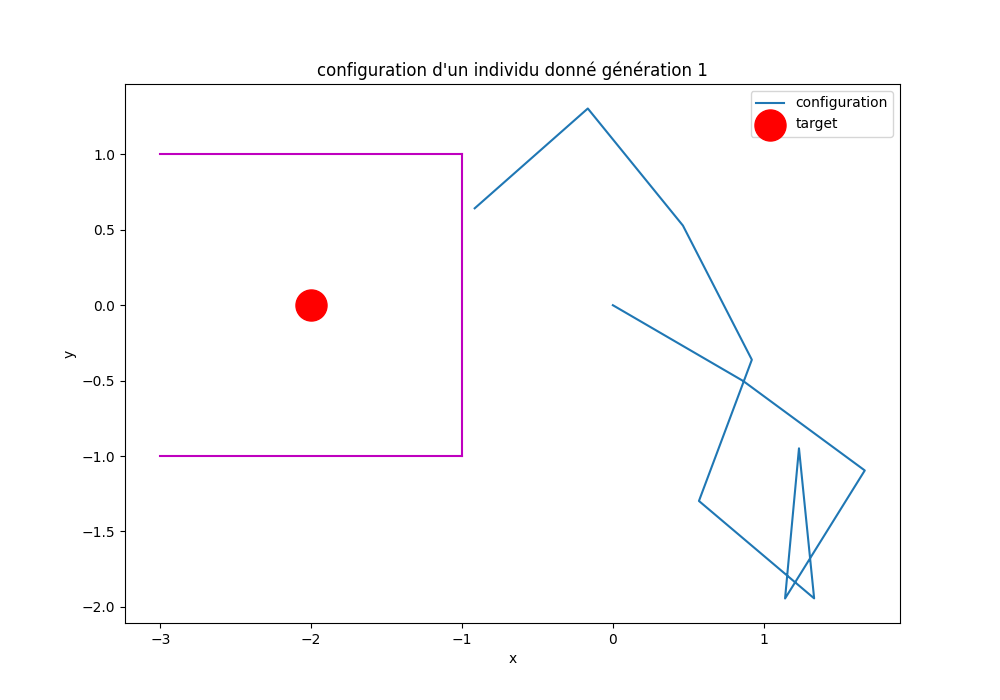
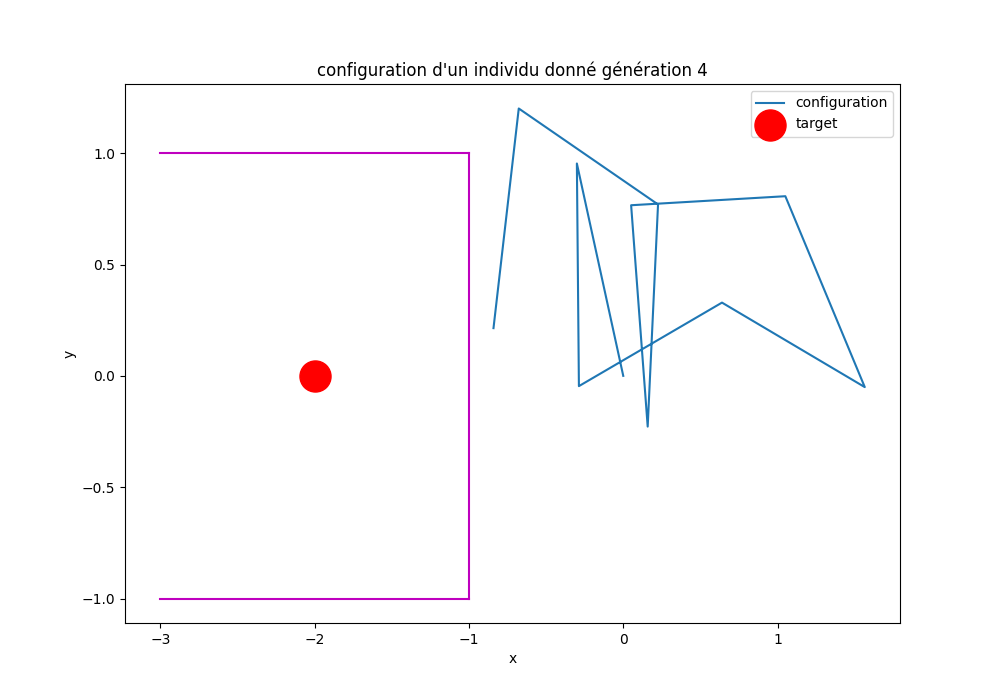
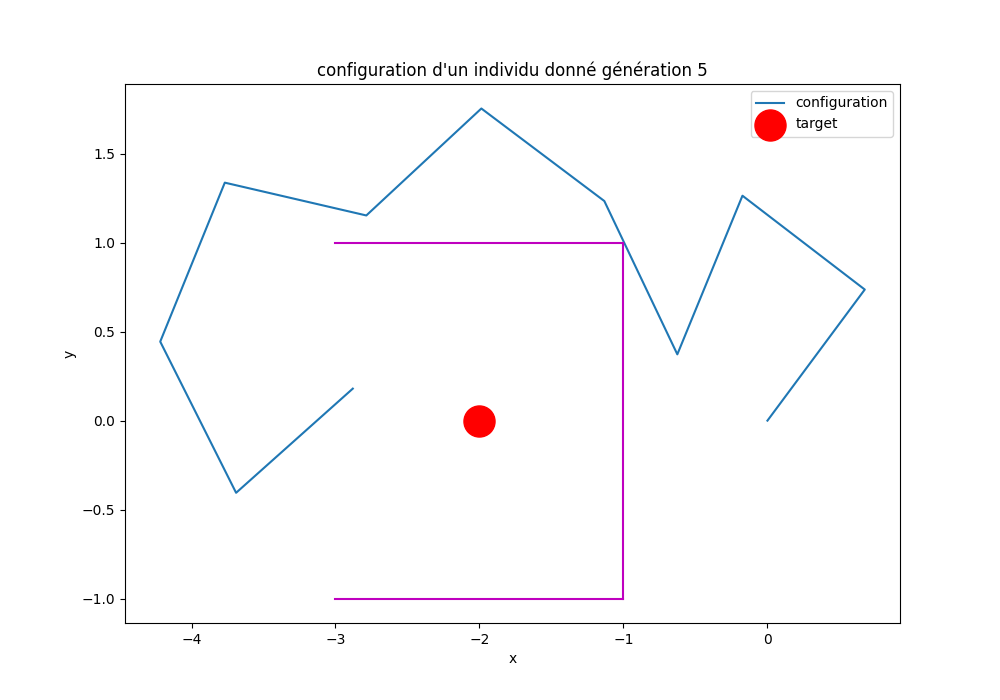
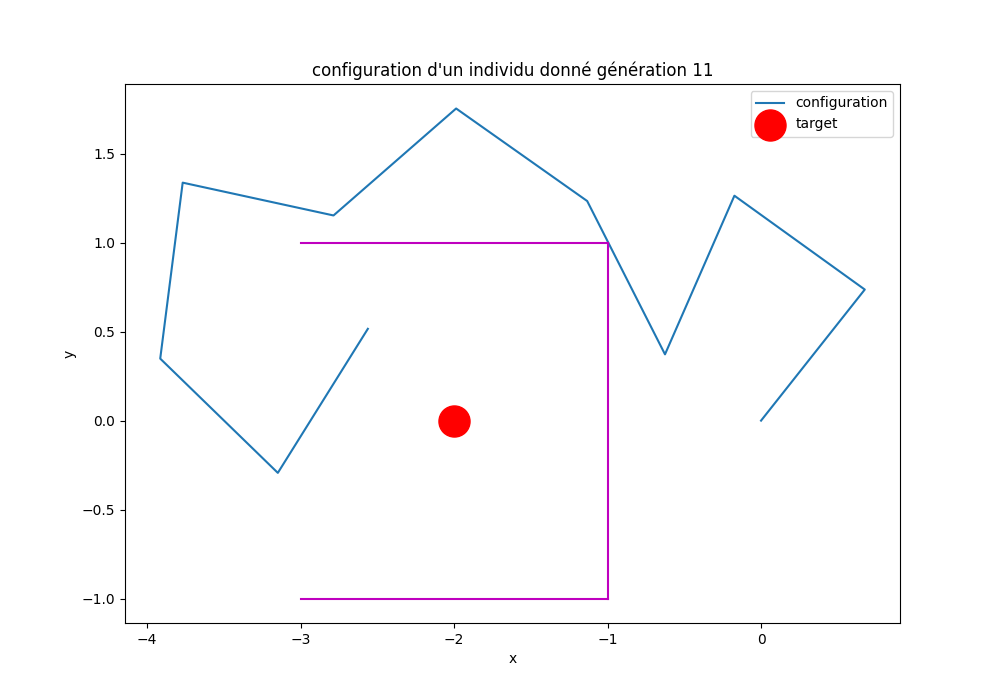
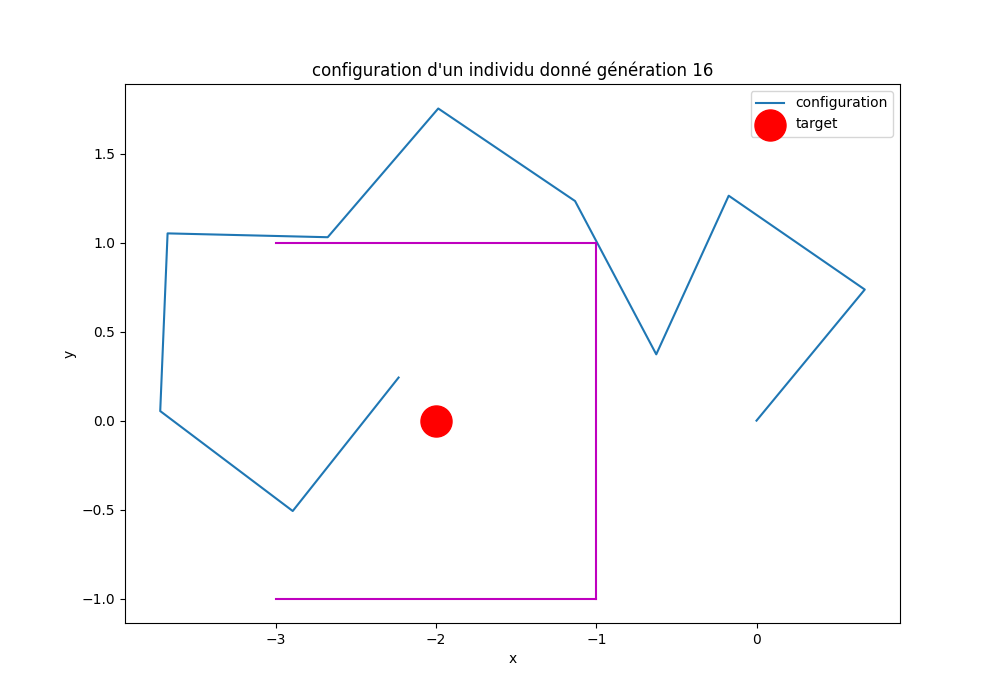
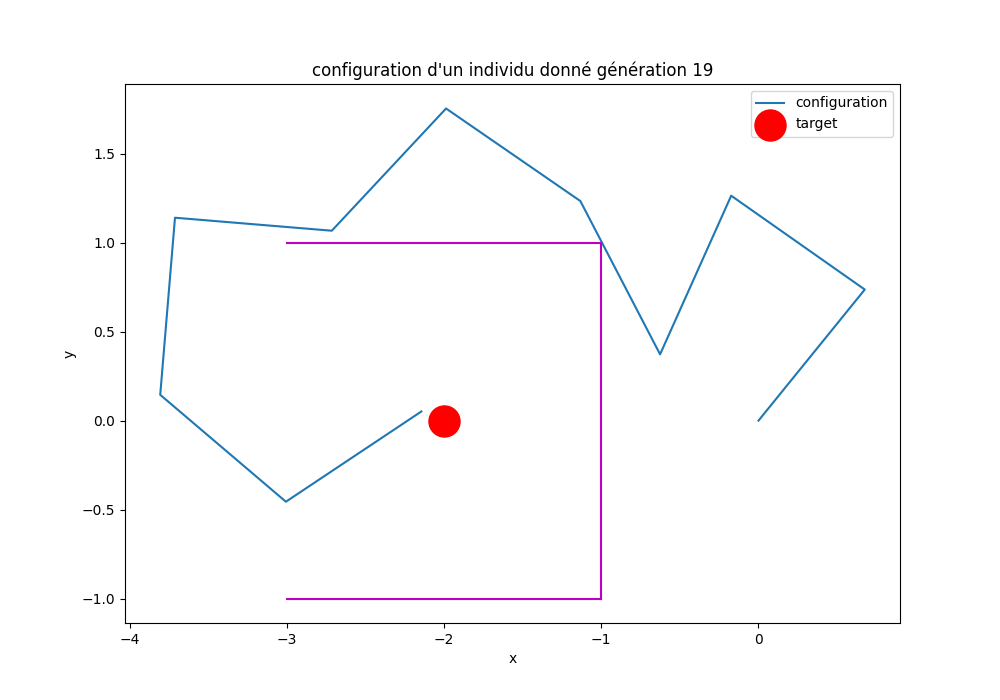
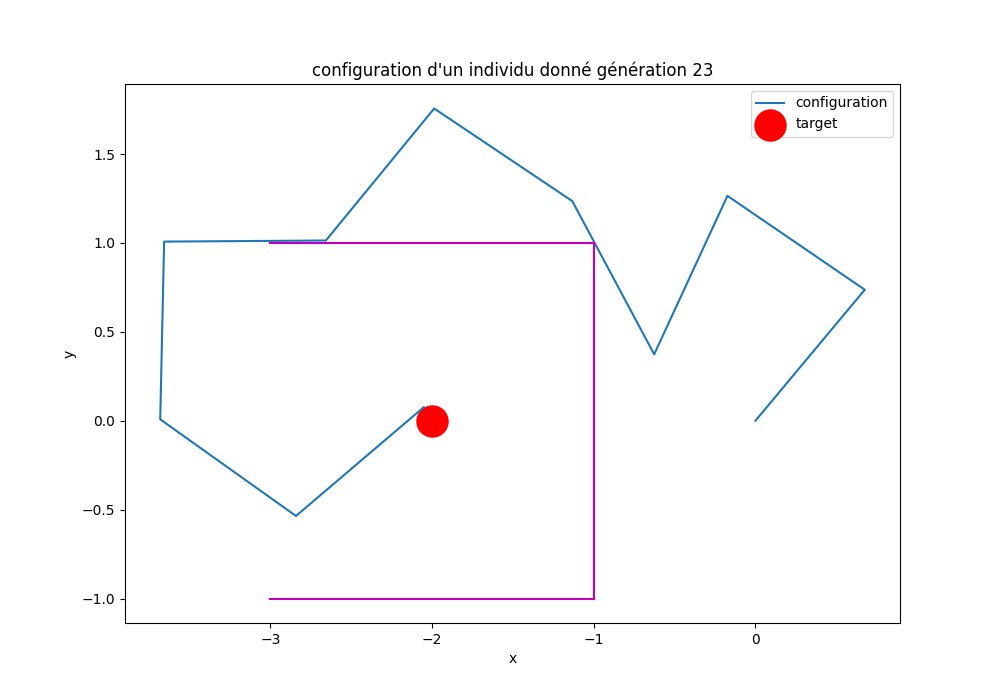

**Commentaire** : Après plusieurs tests, nous avons trouvé une execution ou la configuration du bras a 9 noeud atteint la cible en (-2,0). Nous constatons que les solutions trouvé entre les générations sont assez chaotiques mais évoluent dans le but de se rapprocher le plus possible de la cible, comme nous le voyons sur les clichés ci-dessus. Nous avons arreté de trouver des solutions lorsque la distance entre le bras et la cible est inférieur à **0.2**. Le dernier individu généré est celui de la génération **23**.

### Résultats statistiques

In [23]:
!python3 ea_dps_ka2.py

  0%|                                                    | 0/30 [00:00<?, ?it/s]/home/jdufou1/.local/lib/python3.8/site-packages/scoop/fallbacks.py:38: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  warnings.warn(
Empty grid: no stats...
Empty grid: no dump...
  3%|█▍                                          | 1/30 [01:14<36:00, 74.51s/it]Empty grid: no stats...
Empty grid: no dump...
  7%|██▉                                         | 2/30 [02:29<34:57, 74.90s/it]Empty grid: no stats...
Empty grid: no dump...
 10%|████▍                                       | 3/30 [03:44<33:46, 75.06s/it]Empty grid: no stats...
Empty grid: no dump...
 13%|█████▊                                      | 4/30 [05:00<32:40, 75.40s/it]Empty grid: no stats...
Empty grid: no dump...
 17%|███████▎                               

Nous obtenons les statistiques suivantes pour l'approche **FIT** sur **30** tests:

|type|quantity|ratio en %|
|---|---|---|
|success|11/30|36.6%|
|fails|19/30|63.3%|

A noter que nous avons lancer les tests sur 200 générations max, nous avons obtenu une convergence pour (**36,6%**) des tests.
Parmis les 11 échantillons réussis, la convergence de la position idéal du bras pour une distance < **0.2** est de **13.8** générations.

### 2.2 Variante NS

Mêmes questions avec la variante NS.

### Affichage des configurations intermédiaires

Configuration intermédiaires avec une distance minimale de contact paramétrée à **0.5**.

In [15]:
# <à compléter>

# décrivez en quelques mots ce que vous avez fait, tracez les courbes d'évolution de la fitness, 
# indiquez les statistiques des résultats obtenus, les configurations intermédiaires et ajoutez un bref commentaire
!python3 -m scoop ea_dps_ka2.py

[2022-12-04 22:50:43,562] launcher  INFO    SCOOP 0.7 1.1 on linux using Python 3.8.10 (default, Jun 22 2022, 20:18:18) [GCC 9.4.0], API: 1013
[2022-12-04 22:50:43,563] launcher  INFO    Deploying 4 worker(s) over 1 host(s).
[2022-12-04 22:50:43,563] launcher  INFO    Worker distribution: 
[2022-12-04 22:50:43,563] launcher  INFO       127.0.0.1:	3 + origin
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'MyFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site

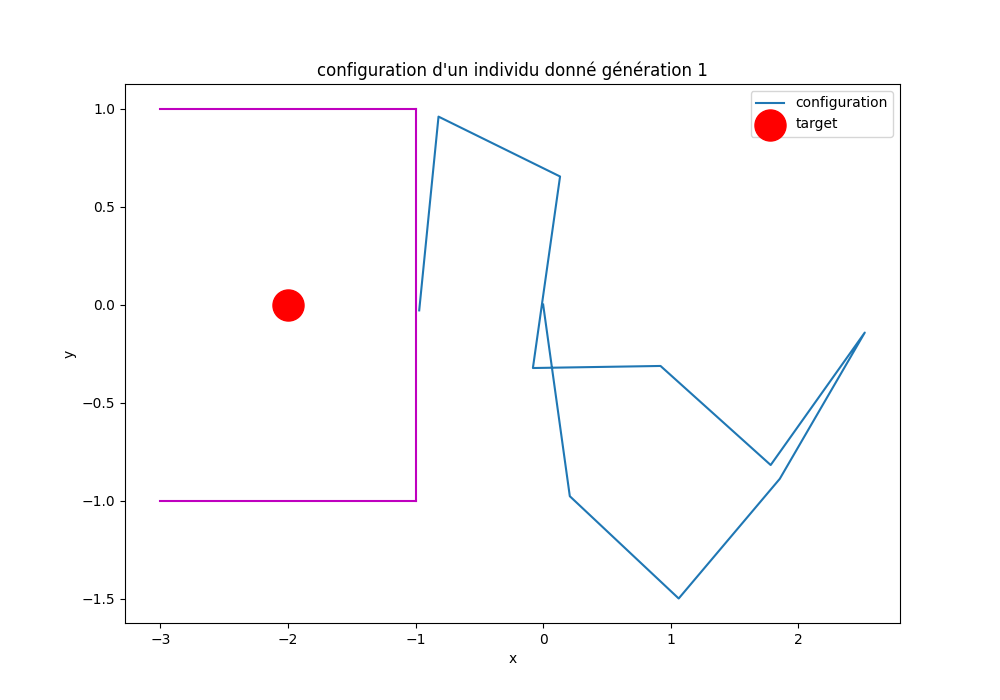
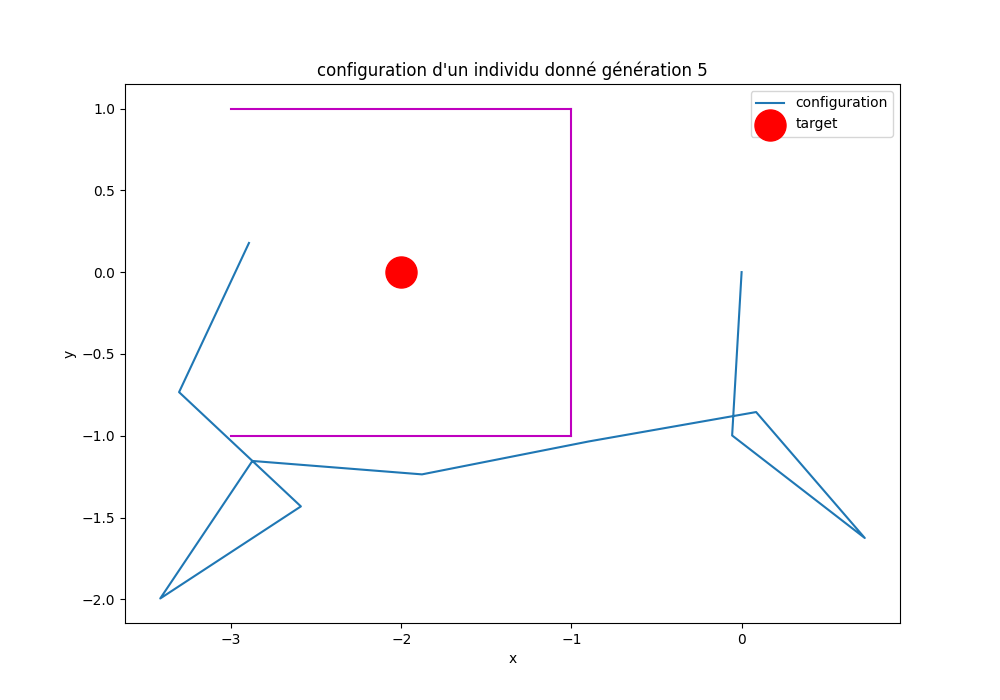
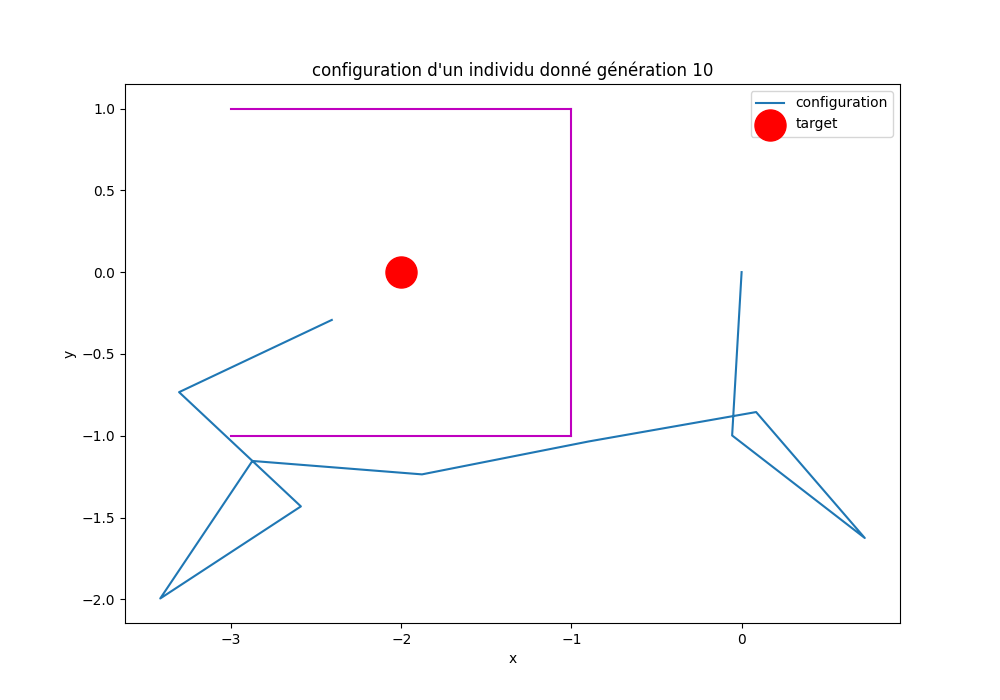
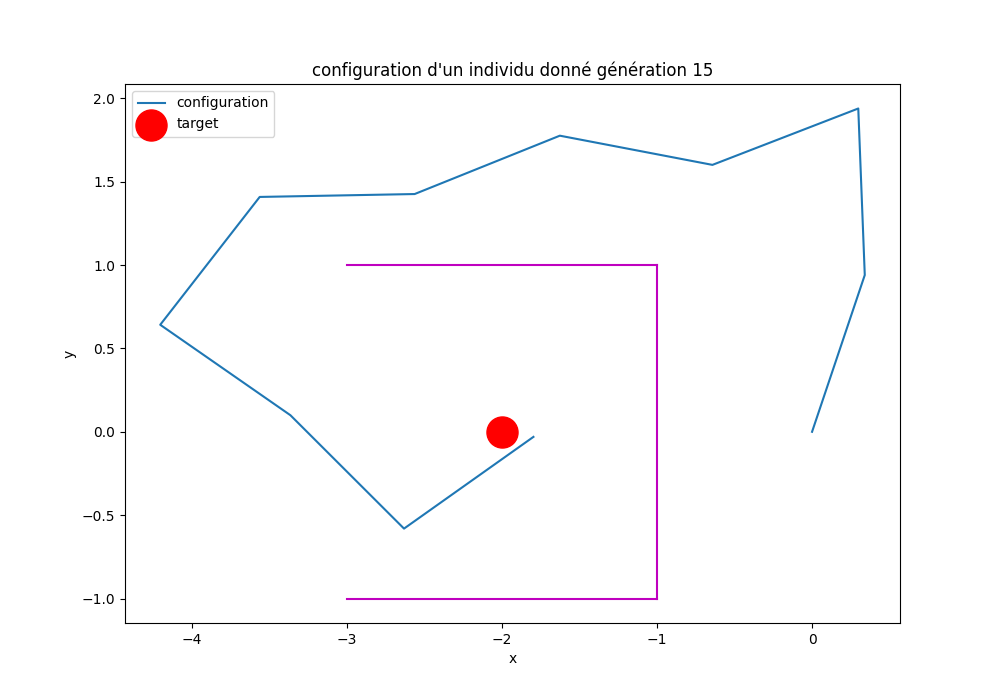
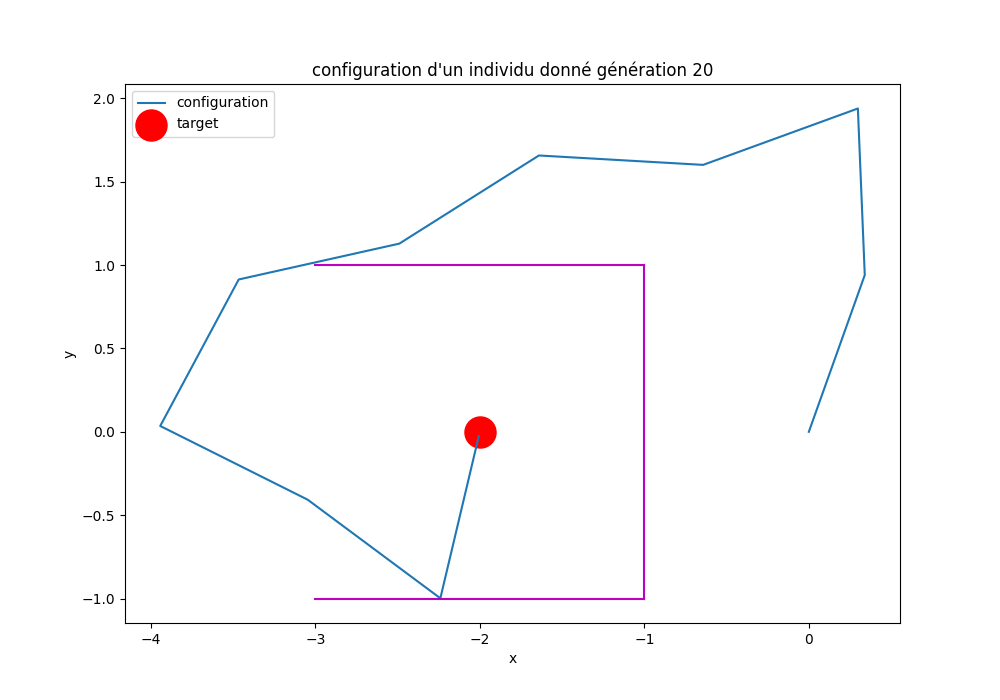
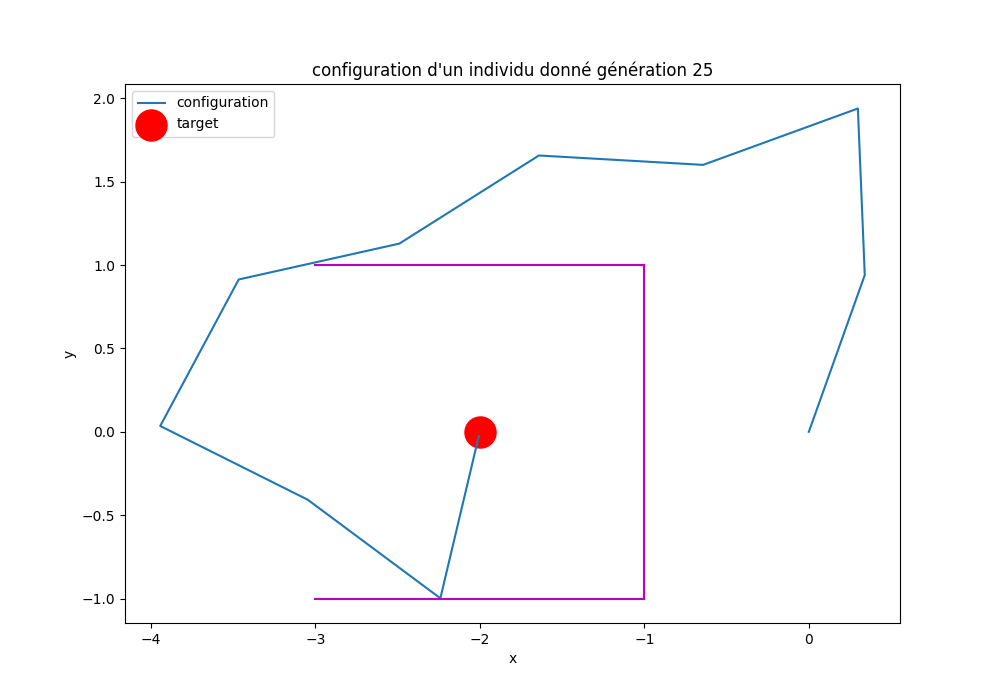
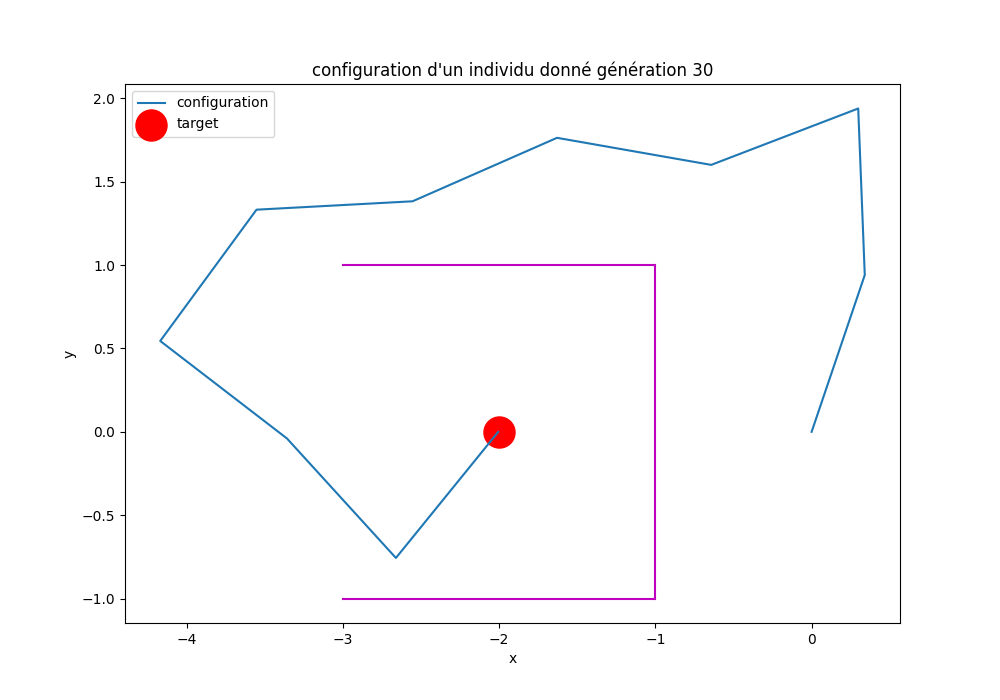
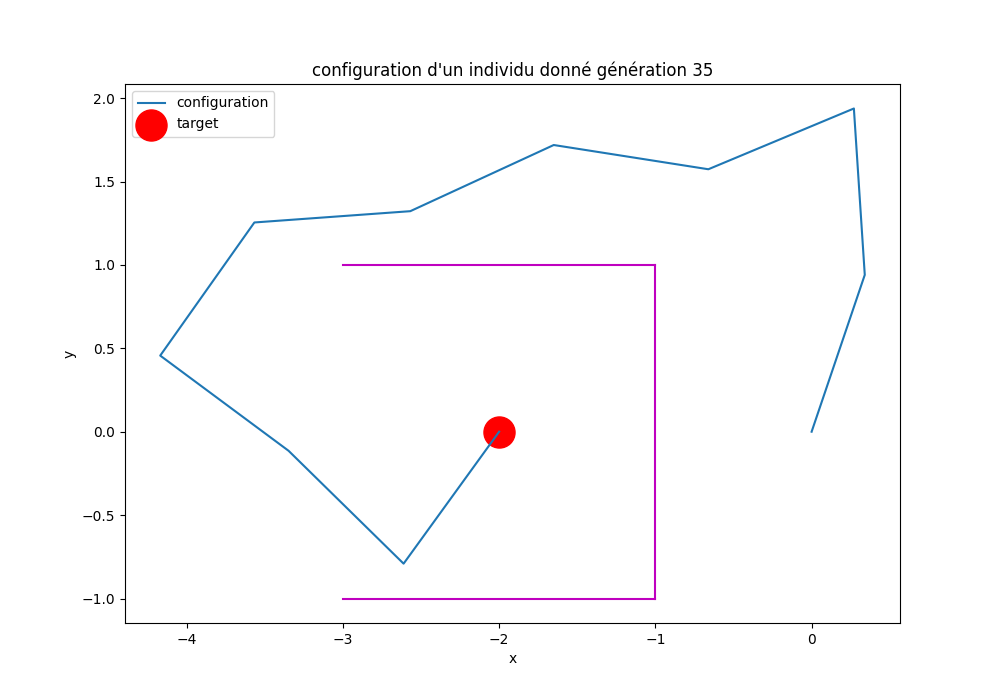
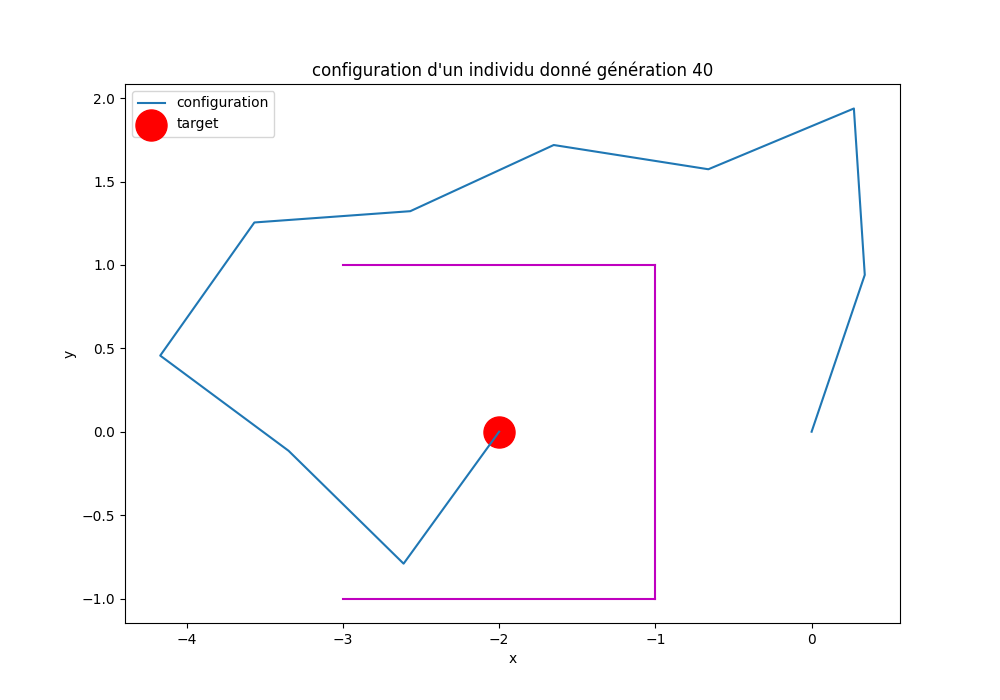


**Commentaire** : 

### Résultat statistiques

In [1]:
!python3 -m scoop ea_dps_ka2.py

[2022-12-09 00:41:32,051] launcher  INFO    SCOOP 0.7 1.1 on linux using Python 3.8.10 (default, Jun 22 2022, 20:18:18) [GCC 9.4.0], API: 1013
[2022-12-09 00:41:32,051] launcher  INFO    Deploying 4 worker(s) over 1 host(s).
[2022-12-09 00:41:32,051] launcher  INFO    Worker distribution: 
[2022-12-09 00:41:32,051] launcher  INFO       127.0.0.1:	3 + origin
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'MyFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site

Nous obtenons les statistiques suivantes pour l'approche **NS** sur **30** tests:

|type|quantity|ratio en %|
|---|---|---|
|success|30/30|100%|
|fails|0/30|0%|

A noter que nous avons lancer les tests sur 500 générations max, nous avons obtenu une convergence pour tous les tests (**100%**)
Parmis les 30 échantillons réussis, la convergence de la position idéal du bras pour une distance < **0.5** est de **99.03** générations.

### 2.3 Variante FIT+NS

Mêmes questions avec la variante qui utilise 2 objectifs: Fitness et Novelty (variante FIT+NS). 

In [5]:
!python3 -m scoop ea_dps_ka2.py

[2022-12-08 22:14:33,328] launcher  INFO    SCOOP 0.7 1.1 on linux using Python 3.8.10 (default, Jun 22 2022, 20:18:18) [GCC 9.4.0], API: 1013
[2022-12-08 22:14:33,328] launcher  INFO    Deploying 4 worker(s) over 1 host(s).
[2022-12-08 22:14:33,328] launcher  INFO    Worker distribution: 
[2022-12-08 22:14:33,328] launcher  INFO       127.0.0.1:	3 + origin
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'MyFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site

## Affichage des configurations intermediaire

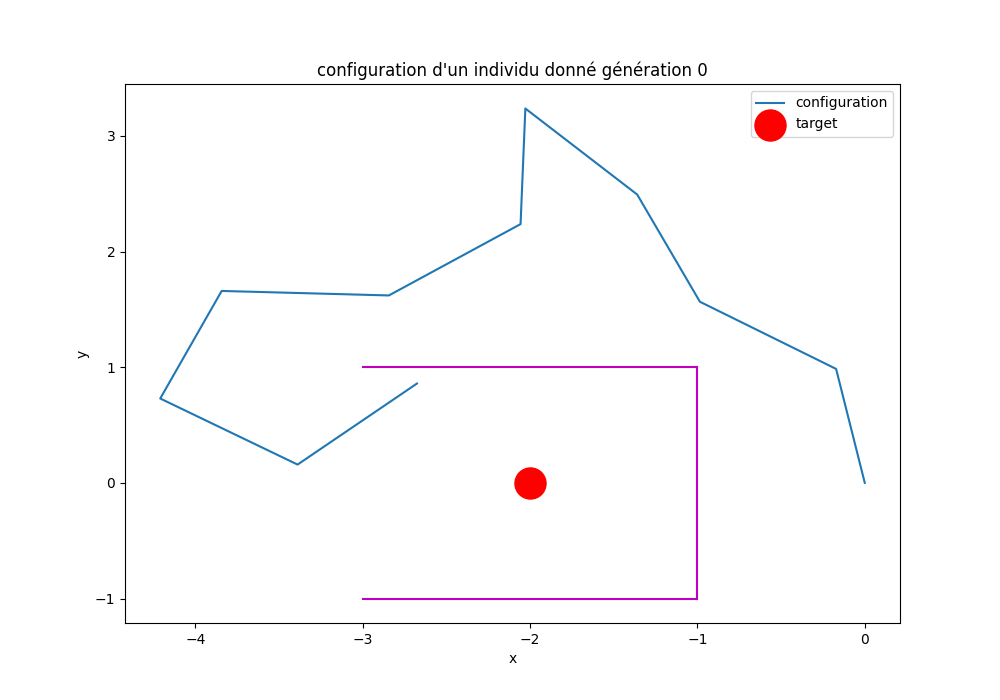
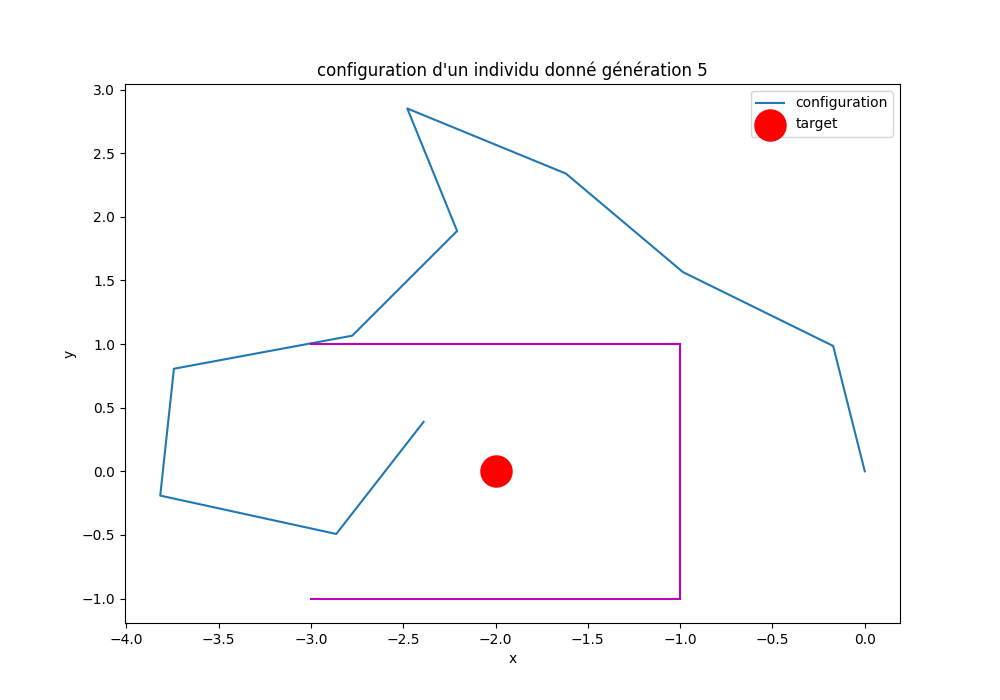
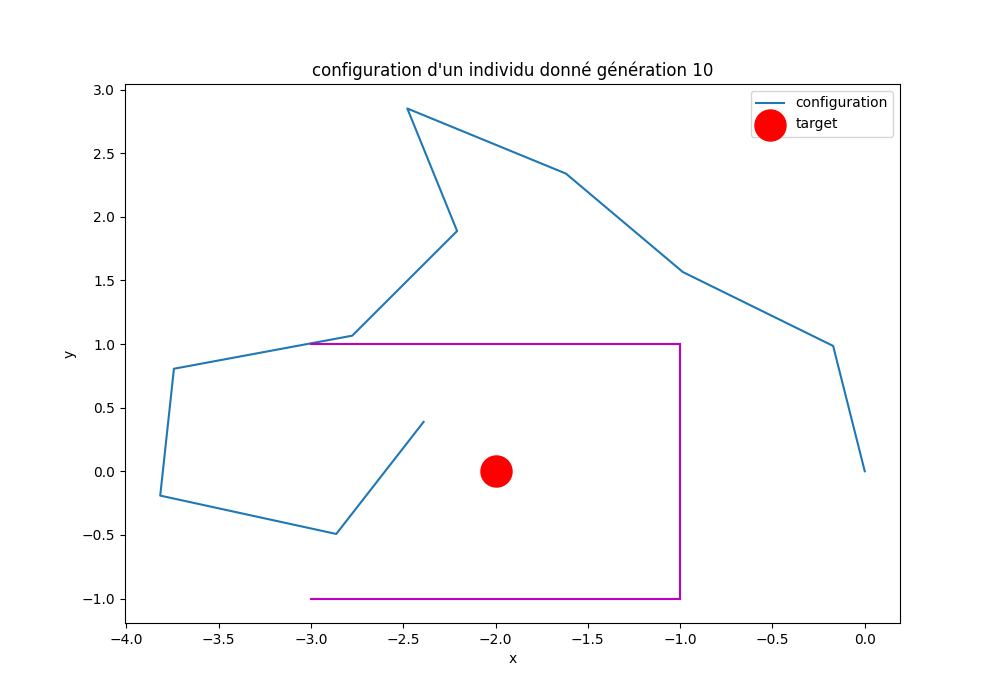
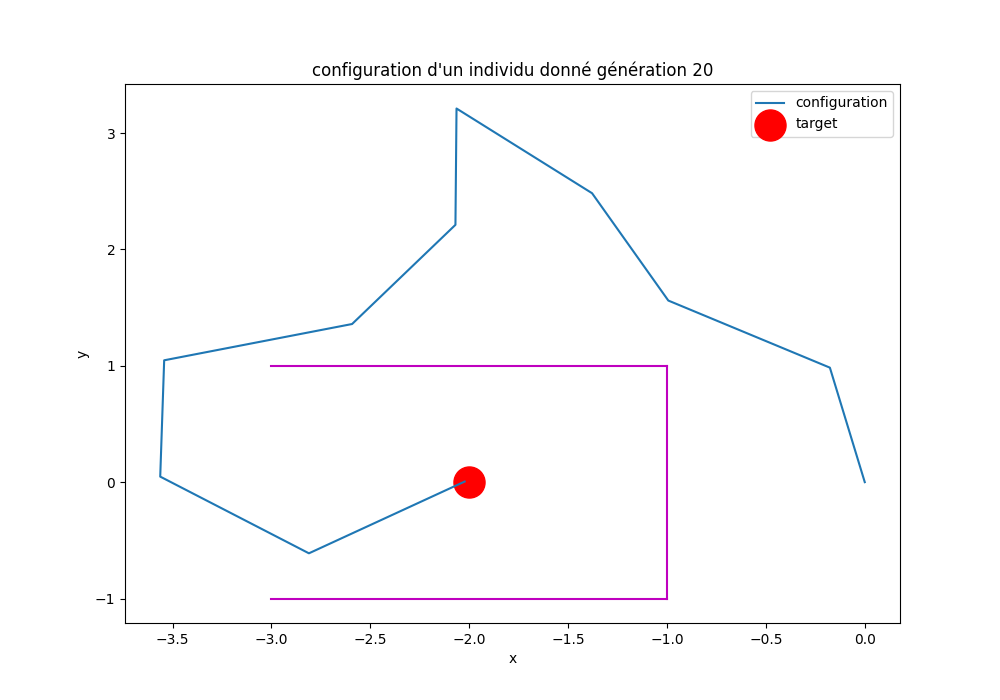
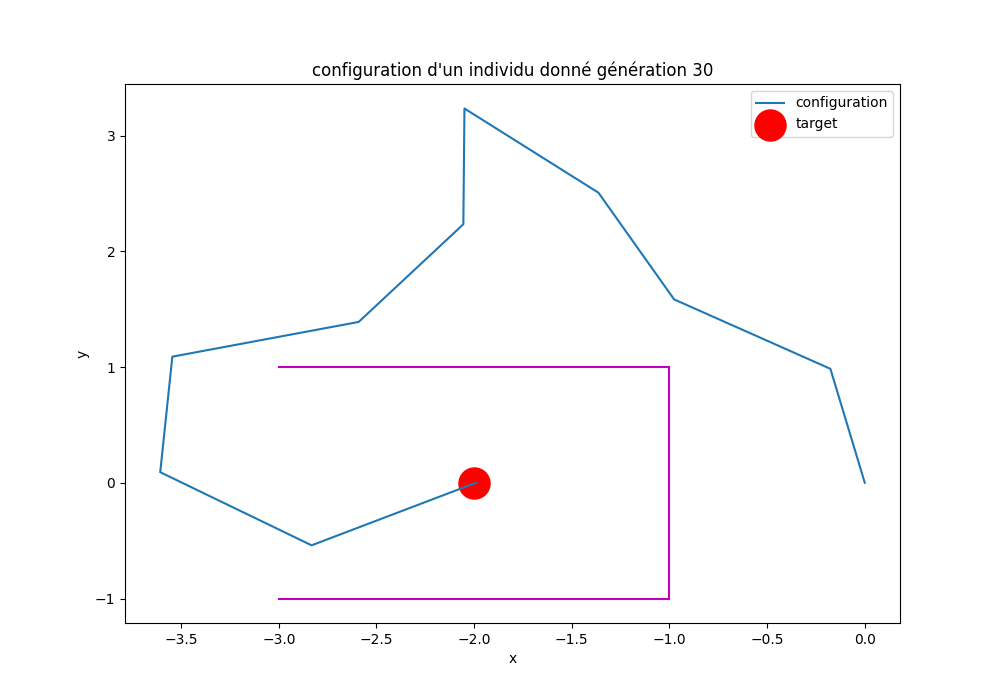
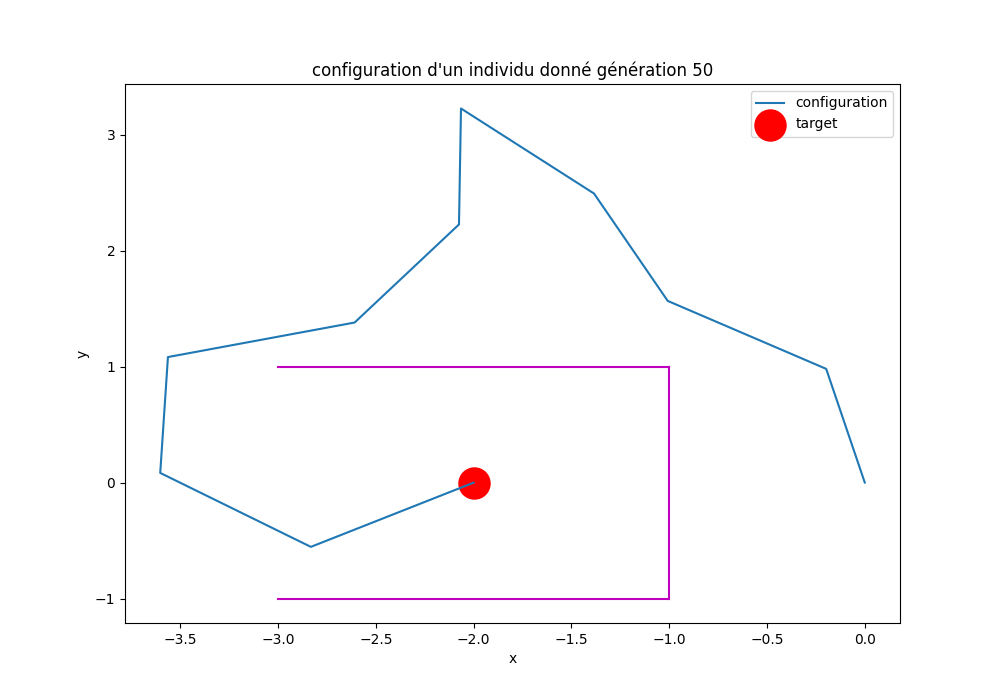
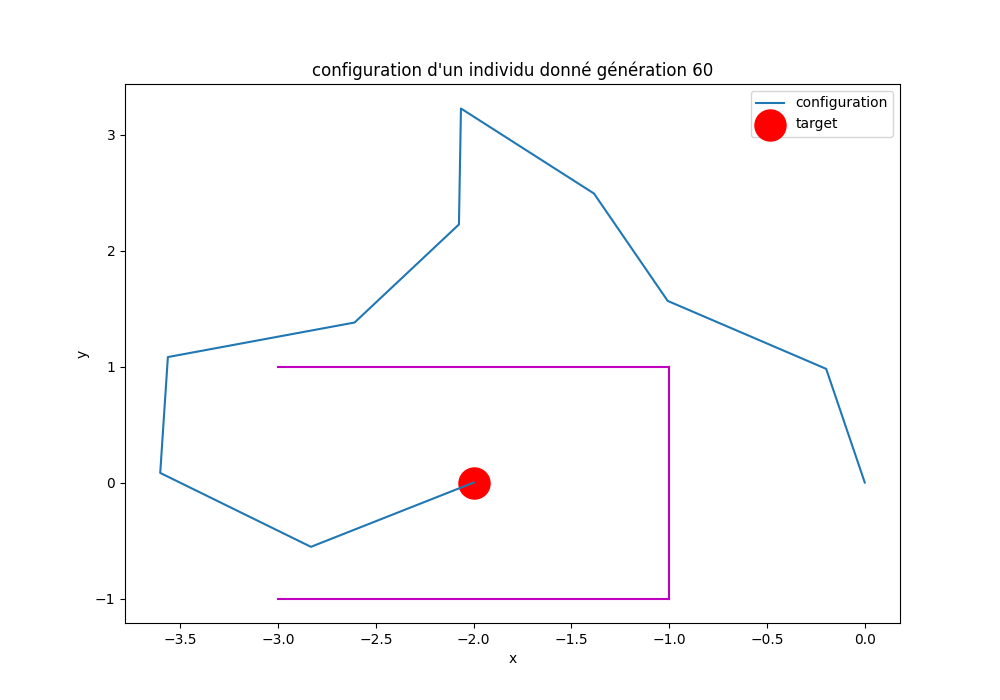
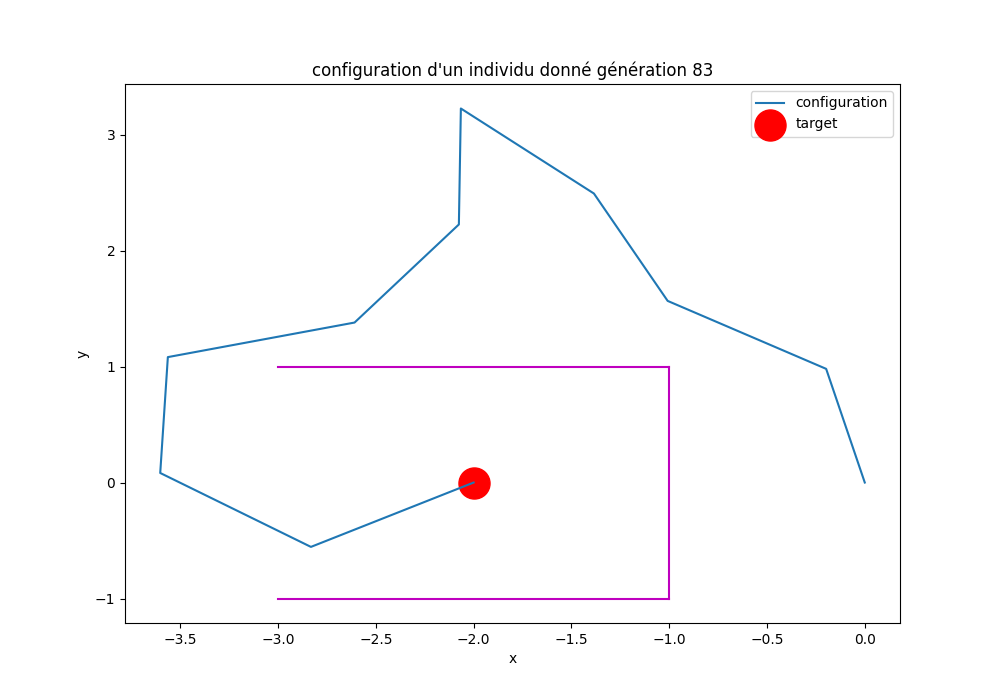

### Résultat statistiques

In [17]:
!python3 -m scoop ea_dps_ka2.py

[2022-12-04 22:55:25,912] launcher  INFO    SCOOP 0.7 1.1 on linux using Python 3.8.10 (default, Jun 22 2022, 20:18:18) [GCC 9.4.0], API: 1013
[2022-12-04 22:55:25,912] launcher  INFO    Deploying 4 worker(s) over 1 host(s).
[2022-12-04 22:55:25,912] launcher  INFO    Worker distribution: 
[2022-12-04 22:55:25,913] launcher  INFO       127.0.0.1:	3 + origin
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'MyFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site

Nous obtenons les statistiques suivantes pour l'approche **FIT+NS** sur **30** tests:

|type|quantity|ratio en %|
|---|---|---|
|success|16/30|53.33%|
|fails|14/30|46.6%|

A noter que nous avons lancer les tests sur 200 générations max pour des raisons de temps, on aurait pu lancer sur beaucoup plus.
Parils les 16 échantillons réussis, la convergence de la position idéal du bras pour une distance < **0.5** est de **78.25** génération.

## 3 Diversité des comportements générés




La position finale de chaque point généré est enregistrée dans le fichier bd.log. Tracez ces différents points sur une même figure pour une experience de NS, de FIT et de FIT+NS. Qu'en déduisez-vous sur la capacité d'exploration de chacun de ces algorithmes ? 

In [21]:
!python3 -m scoop ea_dps_ka2.py

[2022-12-08 22:43:28,630] launcher  INFO    SCOOP 0.7 1.1 on linux using Python 3.8.10 (default, Jun 22 2022, 20:18:18) [GCC 9.4.0], API: 1013
[2022-12-08 22:43:28,630] launcher  INFO    Deploying 4 worker(s) over 1 host(s).
[2022-12-08 22:43:28,630] launcher  INFO    Worker distribution: 
[2022-12-08 22:43:28,630] launcher  INFO       127.0.0.1:	3 + origin
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'MyFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site

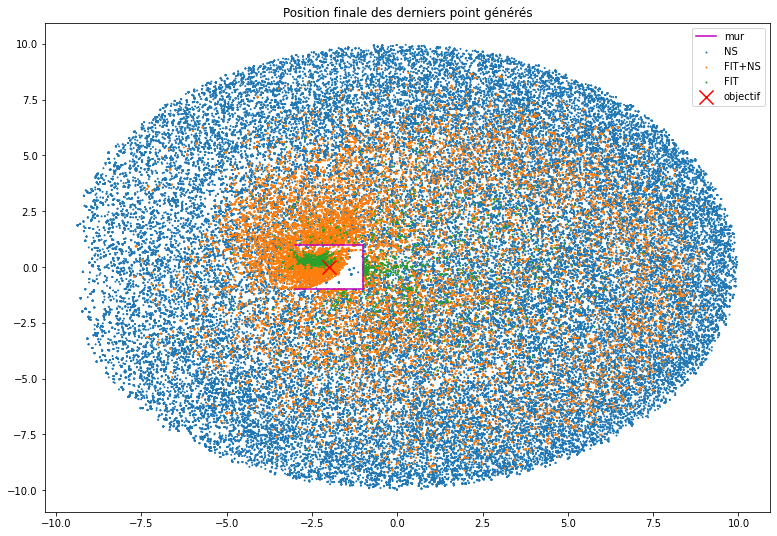

In [16]:
# fit dossier : question_3_fit

import pandas as pd

path_fit = "./question_3_fit/bd.log"
path_ns = "./question_3_ns/bd.log"
path_fit_ns = "./question_3_fit_ns/bd.log"

df_ns = pd.read_csv(path_ns, names=["x","y"] , delimiter=" ")
df_fit = pd.read_csv(path_fit, names=["x","y"] , delimiter=" ")
df_fit_ns = pd.read_csv(path_fit_ns, names=["x","y"] , delimiter=" ")

# display(df)

# print(df["x"])

plt.figure(figsize=(13,9))
plt.title("Position finale des derniers point générés")
plt.scatter(df_ns["x"],df_ns["y"] ,label="NS", s = [1 for n in range(len(df_ns["x"]))])
plt.scatter(df_fit_ns["x"],df_fit_ns["y"], label="FIT+NS", s = [1 for n in range(len(df_fit_ns["x"]))])
plt.scatter(df_fit["x"],df_fit["y"], label="FIT", s = [1 for n in range(len(df_fit["x"]))])

# affichage mur
plt.plot([-1,-1], [-1, 1],c="m" , label="mur")
plt.plot([-1,-3], [-1, -1],c="m")
plt.plot([-1,-3], [1, 1],c="m")

# objectif
plt.scatter([-2],[0],marker='x',s=200,c='r',label="objectif")

plt.legend()
#plt.scatter(df_fit["x"],df_fit["y"])
plt.show()


# <à compléter>

# décrivez en quelques mots ce que vous avez fait et tracez les figures demandées.
        

**Commentaire**: Nous avons executé les versions FIT,FIT+NS et NS, nous avons récupéré les données dans le fichier `bd.log` avec l'aide de pandas. Enfin, nous avons tracé à laide de matplotlib les points.

**Remarque**: Nous voyons que l'approche par nouveauté NS explore le plus car elle couvre une plus grande zone de points, ensuite FIT+NS et enfin FIT.

Tracez sur des figures séparées les points générés pour plusieurs générations successives de NS, FIT et FIT+NS (par exemple 90, 91, 92). Que constatez vous ? 

## Observation FIT

Nombre de générations : 24


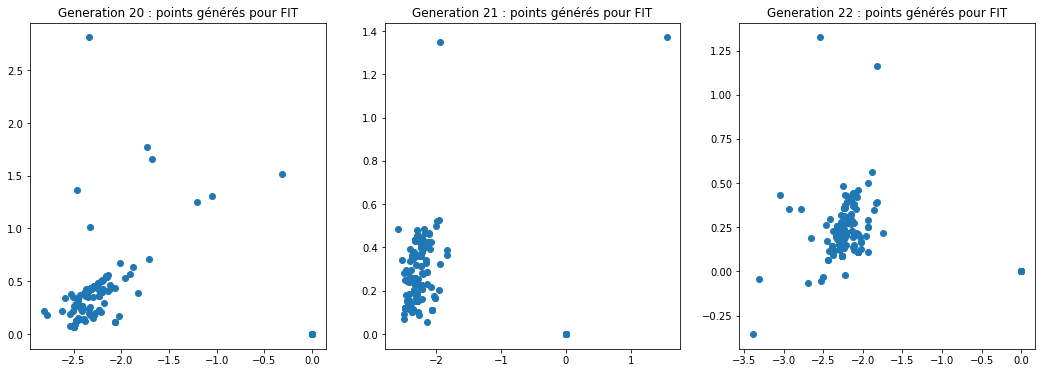

In [60]:
path_fit_fit = "./question_3_fit/fit.log"
with open(path_fit_fit, "r") as file:
    f = file.read()
    l = f.split("\n")
    list_index = list()
    for i in range(len(l)) :
        if "Generation" in l[i] :
            list_index.append(i)
            
path_fit_bd = "./question_3_fit/bd.log"
df_fit = pd.read_csv(path_fit_bd, names=["x","y"] , delimiter=" ")
print("Nombre de générations : "+str(len(list_index)))
generations = [20,21,22,23]

# Affichage

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title("Generation "+str(generations[0])+" : points générés pour FIT")
axs[0].scatter(df_fit["x"][list_index[generations[0]] : list_index[generations[1]]],
            df_fit["y"][list_index[generations[0]] : list_index[generations[1]]])

axs[1].set_title("Generation "+str(generations[1])+" : points générés pour FIT")
axs[1].scatter(df_fit["x"][list_index[generations[1]] : list_index[generations[2]]],
            df_fit["y"][list_index[generations[1]] : list_index[generations[2]]])

axs[2].set_title("Generation "+str(generations[2])+" : points générés pour FIT")
axs[2].scatter(df_fit["x"][list_index[generations[2]] : list_index[generations[3]]],
            df_fit["y"][list_index[generations[2]] : list_index[generations[3]]])

**Commentaire**: Nous voyons sur ces figures que quelques points servent à explorer l'espace des solutions, ensuite la plupart des points générés vont suivre la direction idéal, c'est à dire avec la meilleure fitness. On peut le voir sur la figure ci-dessus qui reprend la génération **20**,**21** et **22** où quelques points servent à explorer et le reste des points se déplace en agrégat. C'est aussi ce phénomène qui peut faire converger l'apprentissage vers des optimums locaux comme on a pu le voir dans la question précèdente.

## Observation NS

Nombre de générations : 421


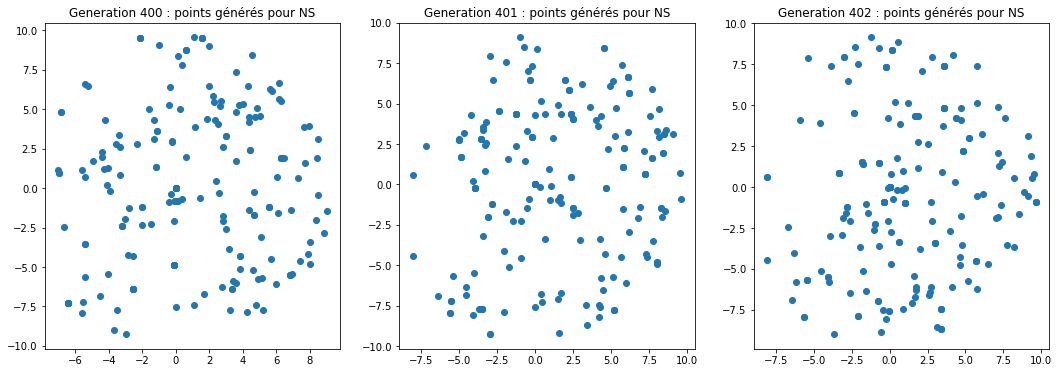

In [61]:
path_ns_fit = "./question_3_ns/fit.log"
with open(path_ns_fit, "r") as file:
    f = file.read()
    l = f.split("\n")
    list_index = list()
    for i in range(len(l)) :
        if "Generation" in l[i] :
            list_index.append(i)
            
print("Nombre de générations : "+str(len(list_index)))
path_ns_bd = "./question_3_ns/bd.log"
df_ns = pd.read_csv(path_ns_bd, names=["x","y"] , delimiter=" ")

generations = [400,401,402,403]

# Affichage

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title("Generation "+str(generations[0])+" : points générés pour NS")
axs[0].scatter(df_ns["x"][list_index[generations[0]] : list_index[generations[1]]],
            df_ns["y"][list_index[generations[0]] : list_index[generations[1]]])

axs[1].set_title("Generation "+str(generations[1])+" : points générés pour NS")
axs[1].scatter(df_ns["x"][list_index[generations[1]] : list_index[generations[2]]],
            df_ns["y"][list_index[generations[1]] : list_index[generations[2]]])

axs[2].set_title("Generation "+str(generations[2])+" : points générés pour NS")
axs[2].scatter(df_ns["x"][list_index[generations[2]] : list_index[generations[3]]],
            df_ns["y"][list_index[generations[2]] : list_index[generations[3]]])

**Commentaire**: Au contraire de la fitness, l'approche par nouveauté va chercher à générer des individus qui vont maximiser la nouveauté avec la distance entre les **k** plus proche voisins. Ci-dessus, les générations **400**, **401** et **402** nous montre ce phénomène ou l'exploration va être davantage utilisée. Cela explique aussi la dificulté à trouver des solutions en temps raisonnable en comparaison avec l'approche **FIT**.

## Observation FIT+NS

Nombre de générations : 198


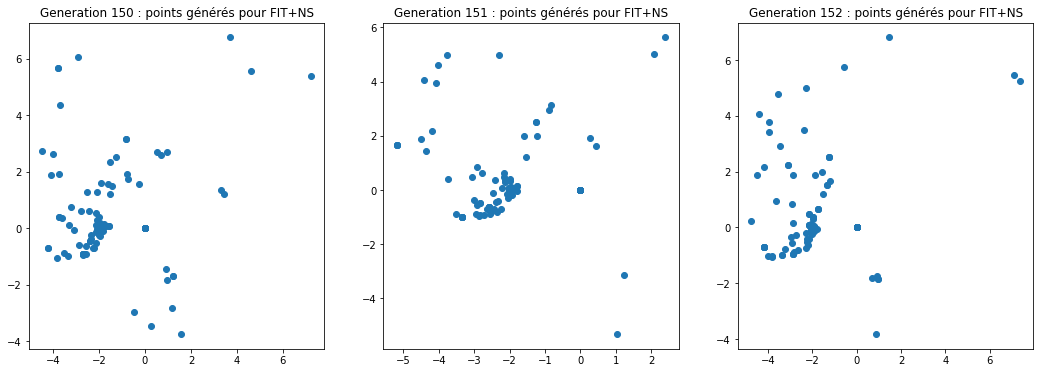

In [64]:
path_fn_fit = "./question_3_fit_ns/fit.log"
with open(path_fn_fit, "r") as file:
    f = file.read()
    l = f.split("\n")
    list_index = list()
    for i in range(len(l)) :
        if "Generation" in l[i] :
            list_index.append(i)
            
print("Nombre de générations : "+str(len(list_index)))
path_fn_bd = "./question_3_fit_ns/bd.log"
df_fn = pd.read_csv(path_fn_bd, names=["x","y"] , delimiter=" ")

generations = [150,151,152,153]

# Affichage

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title("Generation "+str(generations[0])+" : points générés pour FIT+NS")
axs[0].scatter(df_fn["x"][list_index[generations[0]] : list_index[generations[1]]],
            df_fn["y"][list_index[generations[0]] : list_index[generations[1]]])

axs[1].set_title("Generation "+str(generations[1])+" : points générés pour FIT+NS")
axs[1].scatter(df_fn["x"][list_index[generations[1]] : list_index[generations[2]]],
            df_fn["y"][list_index[generations[1]] : list_index[generations[2]]])

axs[2].set_title("Generation "+str(generations[2])+" : points générés pour FIT+NS")
axs[2].scatter(df_fn["x"][list_index[generations[2]] : list_index[generations[3]]],
            df_fn["y"][list_index[generations[2]] : list_index[generations[3]]])

**Commentaire**: Avec l'approche **FIT+NS**, on se propose de mixer les deux stratégies évoqué précédemment en gardant une bonne part d'exploration pour **NS** et d'exploitation pour **FIT**. Les générations **150** , **151** et **152** nous montre la combinaison de l'exploitation et de l'exploration.

**Ce qu'on a fait** : Nous avons enregistrer les résultats pour les 3 approches (**FIT**, **NS** et **FIT+NS**), ensuite nous avons récupérer les données de position dans le fichier `bd.log` et les données de fitness en fonction des individus et des générations dans le fichier `fit.log`. Nous nous sommes servi de ces données pour afficher les positions d'individu pour des générations que nous avons choisi arbitrairement.

## 4 Ajout d'une qualité locale

L'ensemble des solutions générées peut être utilisé pour atteindre n'importe lequel des comportements atteignables, mais l'inconvénient de cette approche est que la notion de qualité est totalement absente du processus, or parmi les solutions générant un comportement donné, toutes ne se valent pas. Certaines sont plus intéressantes que d'autres parce qu'elle consomment moins d'énergie, qu'elles ne créent pas de collision, qu'elles sont plus stables, etc.

Une solution pour prendre en compte un tel critère de qualité consiste à utiliser, à côté de l'objectif de nouveauté, un objectif de performance. Définir cet objectif comme une pression globale est contreproductif, car pour éviter des collisions ou minimiser la consommation d'énergie, il suffit de ne pas bouger... Pour rendre cette pression plus intéressante, il faut en faire un objectif non pas global, mais local.

Pour cela, on peut suivre l'approche proposée par Lehman et Stanley [1]: on compare la fitness de l'individu considéré avec celle de ses plus proches voisins (qui sont déjà déterminés pour le calcul de nouveauté). On ajoute alors un objectif de compétition locale qui vaut le nombre de voisins dont la fitness est inférieure.

Complétez le code de novelty_search.py pour que la fonction de calcul de nouveauté renvoie la nouveauté et l'objectif de compétition locale. Pour cela, vous devrez garder dans l'archive la liste des fitness des points ajoutés.

Utilisez cette nouvelle version pour générer des politiques qui permettent d'atteindre les différentes positions de l'espace en minimisant un tel critère, par exemple l'écart-type sur les angles du bras.

Vous créerez une nouvelle variante et reprendrez le tracé de l'espace exploré en indiquant par une couleur la qualité de chaque point ("heat-map"). Vous comparerez, visuellement, les résultats des différentes variantes.

* [1] Lehman, J., & Stanley, K. O. (2011). Evolving a diversity of virtual creatures through novelty search and local competition. In Proceedings of GECCO

**Ce qu'on a fait** : 
- Ajout de l'objectif de compétition dans `novelty_search.py` en prenant en compte l'ecart type sur les angles du bras
- création du nouvelle variante dans `ea_dps_ka2.py` pour **NSLC**
- mise à jour de l'archive

In [50]:
!python3 -m scoop ea_dps_ka2.py

[2022-12-10 14:56:08,056] launcher  INFO    SCOOP 0.7 1.1 on linux using Python 3.8.10 (default, Jun 22 2022, 20:18:18) [GCC 9.4.0], API: 1013
[2022-12-10 14:56:08,056] launcher  INFO    Deploying 4 worker(s) over 1 host(s).
[2022-12-10 14:56:08,057] launcher  INFO    Worker distribution: 
[2022-12-10 14:56:08,057] launcher  INFO       127.0.0.1:	3 + origin
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'MyFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/jdufou1/.local/lib/python3.8/site

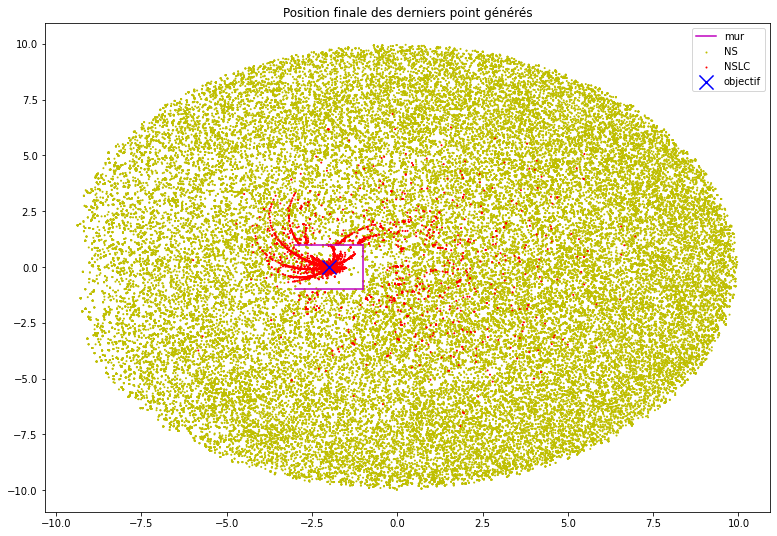

In [54]:

import pandas as pd

path_nslc = "./res_arm_NSLC_2022_12_10_14:29:34/bd.log"

df_nslc = pd.read_csv(path_nslc, names=["x","y"] , delimiter=" ")

path_ns = "./question_3_ns/bd.log"

df_ns = pd.read_csv(path_ns, names=["x","y"] , delimiter=" ")

# display(df)

# print(df["x"])

plt.figure(figsize=(13,9))
plt.title("Position finale des derniers point générés")
plt.scatter(df_ns["x"],df_ns["y"] ,label="NS", c = 'y', s = [1 for n in range(len(df_ns["x"]))])
plt.scatter(df_nslc["x"],df_nslc["y"] ,label="NSLC", c='r', s = [1 for n in range(len(df_nslc["x"]))])

# affichage mur
plt.plot([-1,-1], [-1, 1],c="m" , label="mur")
plt.plot([-1,-3], [-1, -1],c="m")
plt.plot([-1,-3], [1, 1],c="m")

# objectif
plt.scatter([-2],[0],marker='x',s=200,c='b',label="objectif")

plt.legend()
#plt.scatter(df_fit["x"],df_fit["y"])
plt.show()


# <à compléter>

# indiquez rapidement ce que vous avez fait, puis donnez les tracés des espaces explorés colorés 
# par la qualité locale. Vous donnerez un commentaire rapide de ces résultats.

**Commentaire**: Nous voyons d'après la figure ci-dessus que les individus générés par l'approche **NSLC** sont orientés vers l'objectif en cherchant à minimiser l'écart type des points du bras. De plus, les résultats sont bien meilleurs que avec l'approche **NS** car beaucoups plus de points sont proche de l'objectif au lieu d'être éloignés.

## 5 "Illuminer" l'espace exploré

### 5.1 Quantifier l'espace comportemental exploré

Définissez une grille dans l'espace comportemental qui va vous permettre de mesurer l'espace exploré. Découpez l'espace en cases (vous ignorerez les murs pour simplifier) et écrivez une fonction permettant de placer un individu dans la case correspondant à son descripteur comportemental une fois qu'il a été évalué. Il n'y aura qu'un seul individu par case. Lorsque vous tentez d'ajouter un individu dans une case, si elle est déjà remplie, le nouvel individu remplacera l'ancien si sa fitness est plus élevée. 

Cette grille est (pour l'instant) indépendante de l'algorithme d'apprentissage. Elle vise simplement à mesurer la capacité de ce dernier à explorer cet espace et à retrouver facilement, si besoin, une politique efficace permettant d'atteindre un comportement donné.

Vous mesurerez la couverture de votre exploration (pourcentage de cellules explorées). Utilisez une grille de 100x100 cases et déterminez la couverture pour les trois variantes: FIT, NS, FIT+NS et NSLC (vous pourrez vous contenter d'une seule expérience). 


In [95]:
from tqdm import tqdm
import numpy as np
import matplotlib.patches as mpatches

In [109]:
list_x = np.linspace(-10,10,100)
list_y = np.linspace(-10,10,100)

def position_to_coords(x,y) :
    ind_i,ind_j = 0,0
    for i in range(len(list_x)) :
        for j in range(len(list_y)) :
            if x > list_x[i] :
                ind_i = i
            if y > list_x[j] :
                ind_j = j
    return ind_i,ind_j

**Ce qu'on a fait :**
- On a d'abord créée une grille avec 100x100 cases 
- Pour chaque variante, on a la position des points grace a bg.log et la valeur de sa fitness avec fit.log
- Grace a cela, on a pu colorier la case avec la fitness la plus grande. 

### FIT

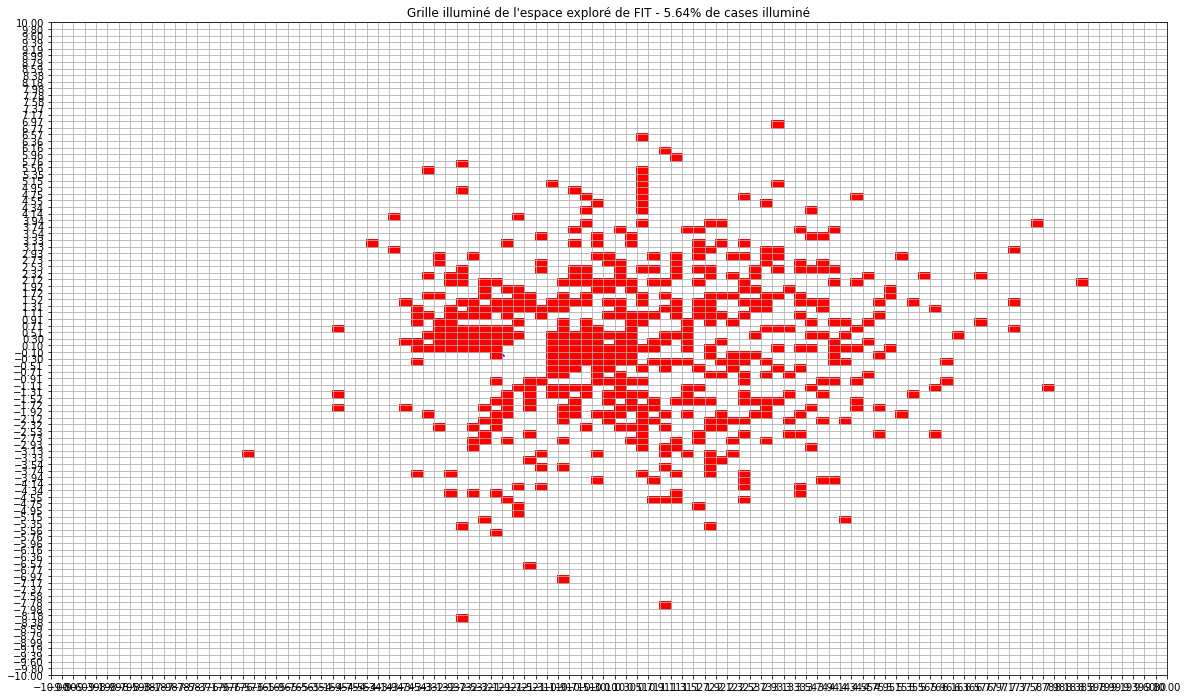

In [108]:
# <à compléter>

d = {(i,j) : None for i in range(len(list_x)) for j in range(len(list_y))}

list_fitness = list()
path_fit_fit = "./question_3_fit/fit.log"
with open(path_fit_fit, "r") as file:
    f = file.read()
    l = f.split("\n")
    list_index = list()
    for i in range(len(l)-1) :
        if "Generation" not in l[i] :
            list_fitness.append(float(l[i]))
            
path_fit_bd = "./question_3_fit/bd.log"
df_fit = pd.read_csv(path_fit_bd, names=["x","y"] , delimiter=" ")  

print('lst points : ',len(df_fit["x"]))
print("List fitness : ",len(list_fitness))

for fitness,(x,y) in tqdm(zip(list_fitness , zip(df_fit["x"].to_numpy(),df_fit["y"].to_numpy()))) :
    ind_i,ind_j = position_to_coords(x,y)
    current_value = d[(ind_i,ind_j)]
    
    if current_value == None :
        d[(ind_i,ind_j)] = fitness
    elif fitness > current_value :
        d[(ind_i,ind_j)] = fitness


x_diff = list_x[1] - list_x[0]
y_diff = list_y[1] - list_y[0]

plt.figure(figsize=(20,12))

case_counter = 0
for i,j in d :
    if d[(i,j)] != None :
        rect=mpatches.Rectangle((list_x[i],list_y[j]),y_diff,x_diff, 
                            fill=True,
                            color="red",
                           linewidth=2)
                           #facecolor="red")
        plt.gca().add_patch(rect)
        case_counter += 1
plt.title(f"Grille illuminé de l'espace exploré de FIT - {round(case_counter/(100*100)*100,3)}% de cases illuminé")
# objectif
plt.scatter([-2],[0],marker='x',s=200,c='b',label="objectif")
plt.xticks(list_x)
plt.yticks(list_y)
plt.grid()
# indiquez rapidement ce que vous avez fait et les résultats trouvés.

**FIT :** 
On remarque que on ne colorie que 5.64 % des cases soit 564 cases sur 10 000, ce qui est très peu. On voit aussi, que pas mal de points sont eparpillés. Enfin, 564 cases sur 4700 points ( 12% ) signifie que plusieurs points sont sur la meme case, pas trop d'exploration. 

### NS

lst points :  84100
List fitness :  84100


84100it [03:18, 424.25it/s]


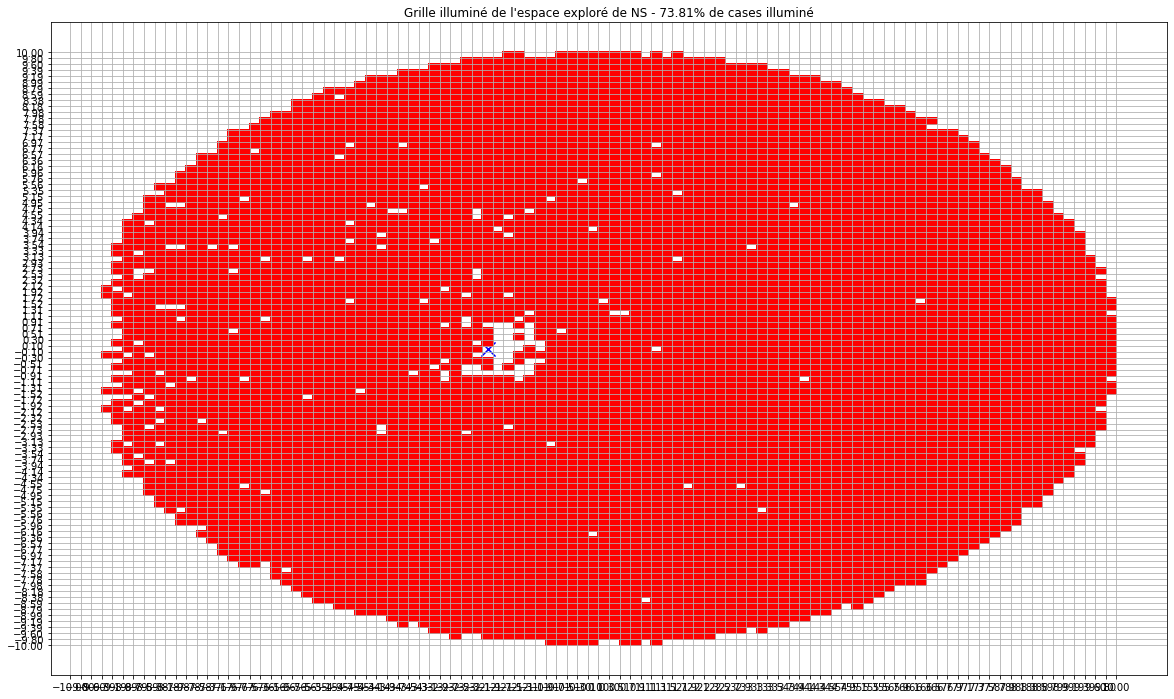

In [110]:
# <à compléter>

d = {(i,j) : None for i in range(len(list_x)) for j in range(len(list_y))}

list_fitness = list()
path_fit_fit = "./question_3_ns/fit.log"
with open(path_fit_fit, "r") as file:
    f = file.read()
    l = f.split("\n")
    list_index = list()
    for i in range(len(l)-1) :
        if "Generation" not in l[i] :
            list_fitness.append(float(l[i]))
            
path_fit_bd = "./question_3_ns/bd.log"
df_fit = pd.read_csv(path_fit_bd, names=["x","y"] , delimiter=" ")  

print('lst points : ',len(df_fit["x"]))
print("List fitness : ",len(list_fitness))

for fitness,(x,y) in tqdm(zip(list_fitness , zip(df_fit["x"].to_numpy(),df_fit["y"].to_numpy()))) :
    ind_i,ind_j = position_to_coords(x,y)
    current_value = d[(ind_i,ind_j)]
    
    if current_value == None :
        d[(ind_i,ind_j)] = fitness
    elif fitness > current_value :
        d[(ind_i,ind_j)] = fitness


x_diff = list_x[1] - list_x[0]
y_diff = list_y[1] - list_y[0]

plt.figure(figsize=(20,12))

case_counter = 0
for i,j in d :
    if d[(i,j)] != None :
        rect=mpatches.Rectangle((list_x[i],list_y[j]),y_diff,x_diff, 
                            fill=True,
                            color="red",
                           linewidth=2)
                           #facecolor="red")
        plt.gca().add_patch(rect)
        case_counter += 1
plt.title(f"Grille illuminé de l'espace exploré de NS - {round(case_counter/(100*100)*100,3)}% de cases illuminé")
# objectif
plt.scatter([-2],[0],marker='x',s=200,c='b',label="objectif")
plt.xticks(list_x)
plt.yticks(list_y)
plt.grid()
# indiquez rapidement ce que vous avez fait et les résultats trouvés.

**NS :** Contrairement a FIT, ici on a beaucoup plus de cases coloriées, 73.81 % soit 7381 cases. L'ensemble des points est assez compact et représente 7381 cases sur ... points, cela montre l'exploration importante de cette variante. 

### FIT+NS

lst points :  39500
List fitness :  39500


39500it [01:31, 431.98it/s]


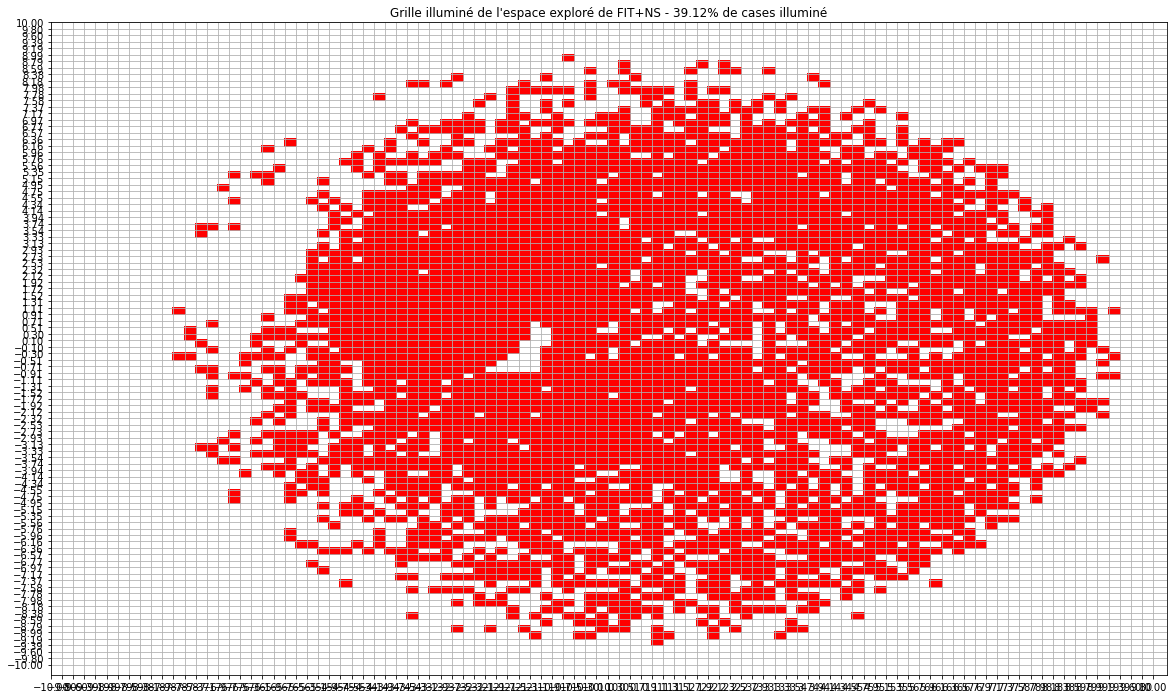

In [112]:
# <à compléter>

d = {(i,j) : None for i in range(len(list_x)) for j in range(len(list_y))}

list_fitness = list()
path_fit_fit = "./question_3_fit_ns/fit.log"
with open(path_fit_fit, "r") as file:
    f = file.read()
    l = f.split("\n")
    list_index = list()
    for i in range(len(l)-1) :
        if "Generation" not in l[i] :
            list_fitness.append(float(l[i]))
            
path_fit_bd = "./question_3_fit_ns/bd.log"
df_fit = pd.read_csv(path_fit_bd, names=["x","y"] , delimiter=" ")  

print('lst points : ',len(df_fit["x"]))
print("List fitness : ",len(list_fitness))

for fitness,(x,y) in tqdm(zip(list_fitness , zip(df_fit["x"].to_numpy(),df_fit["y"].to_numpy()))) :
    ind_i,ind_j = position_to_coords(x,y)
    current_value = d[(ind_i,ind_j)]
    
    if current_value == None :
        d[(ind_i,ind_j)] = fitness
    elif fitness > current_value :
        d[(ind_i,ind_j)] = fitness


x_diff = list_x[1] - list_x[0]
y_diff = list_y[1] - list_y[0]

plt.figure(figsize=(20,12))

case_counter = 0
for i,j in d :
    if d[(i,j)] != None :
        rect=mpatches.Rectangle((list_x[i],list_y[j]),y_diff,x_diff, 
                            fill=True,
                            color="red",
                           linewidth=2)
                           #facecolor="red")
        plt.gca().add_patch(rect)
        case_counter += 1
plt.title(f"Grille illuminé de l'espace exploré de FIT+NS - {round(case_counter/(100*100)*100,3)}% de cases illuminé")
# objectif
plt.scatter([-2],[0],marker='x',s=200,c='b',label="objectif")
plt.xticks(list_x)
plt.yticks(list_y)
plt.grid()
# indiquez rapidement ce que vous avez fait et les résultats trouvés.

**FIT + NS :** Ici, nous avons un mélange des deux variantes vu plus haut, un certain nombre de cases coloriées assez compact (39.12 %) mais avec quand meme pas mal d'aération, a peu près la moitie de NS.

### NSLC

lst points :  36300
List fitness :  36300


36300it [01:24, 427.15it/s]


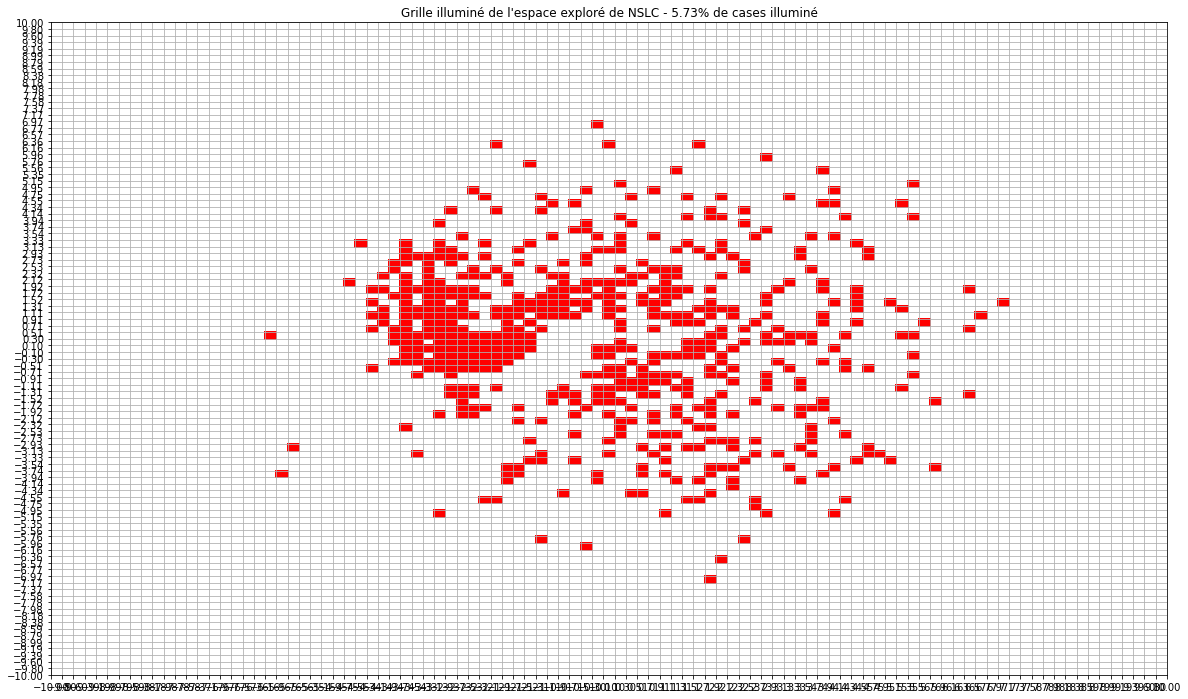

In [113]:
# <à compléter>

d = {(i,j) : None for i in range(len(list_x)) for j in range(len(list_y))}

list_fitness = list()
path_fit_fit = "./question_4_nslc/fit.log"
with open(path_fit_fit, "r") as file:
    f = file.read()
    l = f.split("\n")
    list_index = list()
    for i in range(len(l)-1) :
        if "Generation" not in l[i] :
            list_fitness.append(float(l[i]))
            
path_fit_bd = "./question_4_nslc/bd.log"
df_fit = pd.read_csv(path_fit_bd, names=["x","y"] , delimiter=" ")  

print('lst points : ',len(df_fit["x"]))
print("List fitness : ",len(list_fitness))

for fitness,(x,y) in tqdm(zip(list_fitness , zip(df_fit["x"].to_numpy(),df_fit["y"].to_numpy()))) :
    ind_i,ind_j = position_to_coords(x,y)
    current_value = d[(ind_i,ind_j)]
    
    if current_value == None :
        d[(ind_i,ind_j)] = fitness
    elif fitness > current_value :
        d[(ind_i,ind_j)] = fitness


x_diff = list_x[1] - list_x[0]
y_diff = list_y[1] - list_y[0]

plt.figure(figsize=(20,12))

case_counter = 0
for i,j in d :
    if d[(i,j)] != None :
        rect=mpatches.Rectangle((list_x[i],list_y[j]),y_diff,x_diff, 
                            fill=True,
                            color="red",
                           linewidth=2)
                           #facecolor="red")
        plt.gca().add_patch(rect)
        case_counter += 1
plt.title(f"Grille illuminé de l'espace exploré de NSLC - {round(case_counter/(100*100)*100,3)}% de cases illuminé")
# objectif
plt.scatter([-2],[0],marker='x',s=200,c='b',label="objectif")
plt.xticks(list_x)
plt.yticks(list_y)
plt.grid()
# indiquez rapidement ce que vous avez fait et les résultats trouvés.

**NSLC :** Enfin, la derniere variante a un peu plus que FIT avec 5.73% a la différence que les cas coloriées ici sont pour la plupart regroupé sur la target. 

### 5.2 MAP-Elites

#### 5.2.1 Implémentation de MAP-Elites

La grille définie à la question précédente permet de définir un algorithme très simple: MAP-Elites [1]. Dans cet algorithme, la sélection s'appuie sur la grille. La génération d'un nouvel individu consiste à tirer aléatoirement un (si mutation uniquement) ou deux individus (si croisement) dans la grille puis à appliquer l'opérateur génétique de mutation ou de croisement. Après évaluation, on tente d'ajouter cet individu dans la grille. Si la case correspondante est vide, on l'ajoute, sinon, on le compare à l'individu déjà présent et on le remplace si la fitness est améliorée.

Utilisez cet algorithme sur la tâche précédente et affichez les résultats: évolution de la couverture et grille finale obtenue.



* [1] Mouret, J. B., & Clune, J. (2015). Illuminating search spaces by mapping elites. arXiv preprint arXiv:1504.04909

In [4]:
# <à compléter>

# indiquez ici les résultats trouvés

#### 5.2.2 OPTION: Variantes de MAP-Elites

MAP-Elites peut aussi être amélioré avec des stratégies de choix des parents qui ne sont plus uniformes sur toute la grille, mais biaisées pour favoriser les cellules isolées ou les individus dont les descendants ont réussi à remplir des cellules (score de "curiosité" [1]). Testez cette variante sur la tâche précédente et observez l'évolution de la couverture ainsi que la grille finale obtenue.

* [1] Cully, A., & Demiris, Y. (2017). Quality and diversity optimization: A unifying modular framework. IEEE Transactions on Evolutionary Computation, 22(2), 245-259.

In [4]:
# <à compléter>

# indiquez ici les résultats trouvés